In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [2]:
# Load IMDB dataset
vocab_size = 10000  # Only consider the top 10,000 words
maxlen = 200        # Limit each review to 200 words
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=vocab_size)



17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 138s 8us/step


In [3]:
# Pad sequences to ensure uniform length
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)


In [4]:
# Build the DNN model
model = keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6112 - loss: 0.6259 - val_accuracy: 0.8560 - val_loss: 0.3357
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9246 - loss: 0.2028 - val_accuracy: 0.8576 - val_loss: 0.3416
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9880 - loss: 0.0579 - val_accuracy: 0.8584 - val_loss: 0.3896
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9979 - loss: 0.0161 - val_accuracy: 0.8500 - val_loss: 0.4464
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9993 - loss: 0.0051 - val_accuracy: 0.8572 - val_loss: 0.4542


In [7]:
# Evaluate on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {accuracy:.2f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8516 - loss: 0.4674

Test Accuracy: 0.85


In [8]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

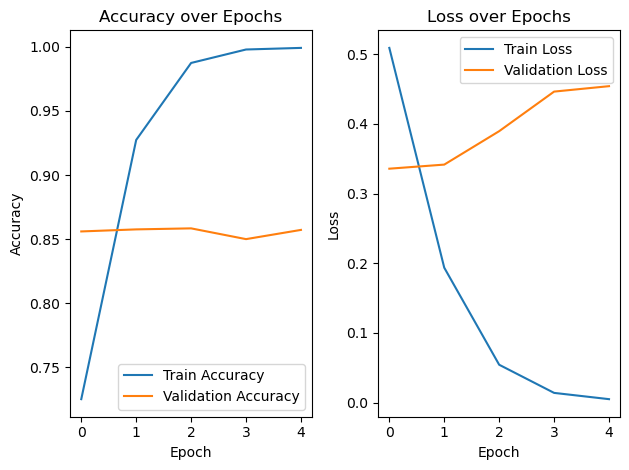

<Figure size 640x480 with 0 Axes>

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 6s 4us/step


Sample Predictions on Test Data:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Review 1:
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> ...
Actual Label: Negative
Predicted Label: Negative
--------------------------------------------------------------------------------
Review 2:
psychological <UNK> it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one...
Actual Label: Positive
Predicted Label: Positive
----------------------------------------------------------------------

In [11]:

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

# # Load word index to decode integer sequences into words
word_index = keras.datasets.imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED"] = 3

reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
    
# Actual vs predicted

import numpy as np
print("\n\nSample Predictions on Test Data:\n")
num_samples_to_show = 5
predictions = model.predict(x_test[:num_samples_to_show])

for i in range(num_samples_to_show):
    decoded = decode_review(x_test[i])
    actual_label = "Positive" if y_test[i] == 1 else "Negative"
    predicted_label = "Positive" if predictions[i] >= 0.5 else "Negative"
    print(f"Review {i+1}:")
    print(decoded[:300] + "...")
    print(f"Actual Label: {actual_label}")
    print(f"Predicted Label: {predicted_label}")
    print("-" * 80)
